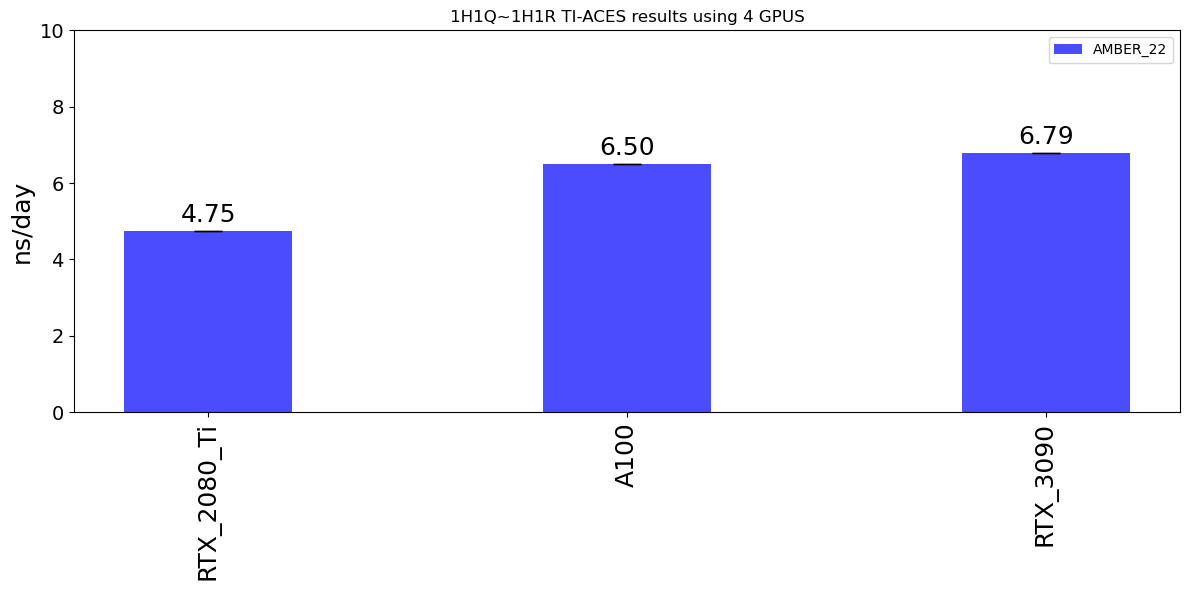

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of file names for Amber and OpenMM
amber_filenames = [
    'rtx_2080_ti_results_amber.dat', 
    'rtx_3090_ti_results_amber.dat',
    'A100_results_amber.dat'
]

device = ['RTX_2080_Ti', 'RTX_3090', 'A100']


# CUDA compatibility scores for each device
cuda_scores = { 'RTX_2080_Ti': 7.5,'RTX_3090': 8.6,'A100': 8.0 }


# Initialize lists to hold the averages and standard deviations for Amber, OpenMM, NAMD, and GROMACS
amber_averages = []
amber_standard_deviations = []


# Loop through each file, calculate the average and standard deviation of the second column for Amber
for file in amber_filenames:
    # Check if file exists
    if not os.path.isfile(file):
        print(f"File {file} not found.")
        continue

    # Read the data from the file
    data = pd.read_csv(file, sep='\s+', header=None)
    second_column = data.iloc[:, 0]

    # Calculate average and standard deviation and append to Amber lists
    amber_averages.append(second_column.mean())
    amber_standard_deviations.append(second_column.std())


# Sort the data based on the increasing order of CUDA compatibility scores
sorted_indices = sorted(range(len(device)), key=lambda i: cuda_scores[device[i]])
device = [device[i] for i in sorted_indices]
amber_averages = [amber_averages[i] for i in sorted_indices]
amber_standard_deviations = [amber_standard_deviations[i] for i in sorted_indices]

# Create a single figure and plot data on the same plot
x_positions = np.arange(len(device))
width = 0.40

fig, ax = plt.subplots(figsize=(12, 6))
amber_bars = ax.bar(x_positions, amber_averages, width, label='AMBER_22', yerr=amber_standard_deviations, alpha=0.7, ecolor='black', capsize=10, color="blue")


# Add labels and titles
ax.set_ylabel('ns/day',fontsize=18)
ax.set_title('1H1Q~1H1R TI-ACES results using 4 GPUS')
ax.set_xticks(x_positions)
ax.set_xticklabels(device, rotation="vertical", fontsize=18)
ax.set_yticks(np.arange(0, 11, 2))
ax.set_ylim(top=10, bottom=0)
ax.legend()

# Annotate average values on top of each bar
for i, v in enumerate(amber_averages):
    ax.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=18)

# Set tick size for y-axis
ax.tick_params(axis='y', which='major', labelsize=14)

# Save the combined plot
plt.tight_layout()
plt.savefig('combined_benchmarks_TI_ACES_4_gpus.jpg', dpi=450, bbox_inches='tight')

# Display the plot
plt.show()
